In [3]:
#!pip install lazypredict
#!pip install -U scikit-learn
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Successfully uninstalled scikit-learn-1.4.1.post1


You can safely remove it manually.


   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.3 MB 812.7 kB/s eta 0:00:11
    --------------------------------------- 0.2/8.3 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.2/8.3 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.3/8.3 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/8.3 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.3 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/8.3 MB 2.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.3 MB 2.0 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/8.3 MB 2.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/8.3 MB 2.2 MB/s eta 0:00:04
   ---- -----------------------

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#preprocess
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
import warnings
warnings.filterwarnings("ignore")




## Load Dataset

In [3]:
df = pd.read_csv(r"../notebook/thyroid.csv")#,header=None)
df.head(5)


,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,0,41.0,F,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,1,23.0,F,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,2,46.0,M,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,3,70.0,F,t,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,4,70.0,F,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


## Data Pre-process

In [5]:
#working columns name
#df=df[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'classes']]
#df

IndentationError: unexpected indent (4094837848.py, line 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2800 non-null   int64  
 1   age                        2799 non-null   float64
 2   sex                        2690 non-null   object 
 3   on_thyroxine               2800 non-null   object 
 4   query_on_thyroxine         2800 non-null   object 
 5   on_antithyroid_medication  2800 non-null   object 
 6   sick                       2800 non-null   object 
 7   pregnant                   2800 non-null   object 
 8   thyroid_surgery            2800 non-null   object 
 9   I131_treatment             2800 non-null   object 
 10  query_hypothyroid          2800 non-null   object 
 11  query_hyperthyroid         2800 non-null   object 
 12  lithium                    2800 non-null   object 
 13  goitre                     2800 non-null   objec

In [7]:
print(df.shape)

df.describe()


(2800, 31)


,Unnamed: 0,age,TSH,T3,TT4,T4U,FTI,TBG
count,2800.000000,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0
mean,1399.500000,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN
std,808.434702,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN
min,0.000000,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,699.750000,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,1399.500000,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,2099.250000,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,2799.000000,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


In [8]:
# is null value
df.isnull().sum()


Unnamed: 0                      0
age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_sourc

In [9]:
#df.columns=[x.lower() for x in df.columns]
#df.head()


In [10]:
#target
#Checking for unique values in classes column
df['classes'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [11]:
n = len(df[df['classes'] == 'negative'])
print('negative:',n)
n = len(df[df['classes'] == 'compensated hypothyroid'])
print('compensated hypothyroid',n)
n = len(df[df['classes'] == 'primary hypothyroid'])
print('primary hypothyroid:',n)
n = len(df[df['classes'] == 'secondary hypothyroid'])
print('secondary hypothyroid:',n)

negative: 2580
compensated hypothyroid 154
primary hypothyroid: 64
secondary hypothyroid: 2


<Axes: >

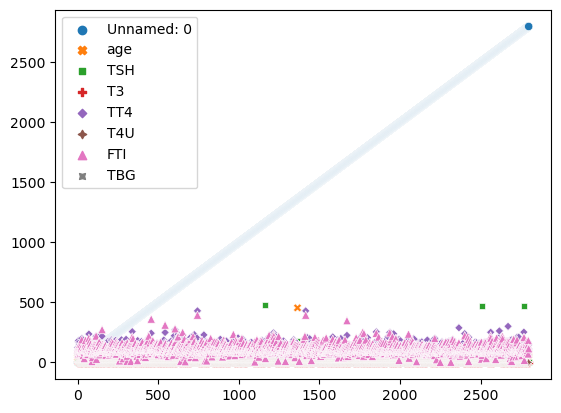

In [12]:
sns.scatterplot(df)

In [13]:
#age,sex,tsh,t3,tt4,t4u,fti,tbg == having null values


In [17]:
print('age:',df['age'].isnull().sum())
print('sex:',df['sex'].isnull().sum())
print('TSH :',df['TSH'].isnull().sum())
print('T3:',df['T3'].isnull().sum())
print('TT4:',df['TT4'].isnull().sum())
print('T4U:',df['T4U'].isnull().sum())
print('FTI:',df['FTI'].isnull().sum())
print('TBG:',df['TBG'].isnull().sum())

age: 1
sex: 110
TSH : 284
T3: 585
TT4: 184
T4U: 297
FTI: 295
TBG: 2800


<Axes: xlabel='classes', ylabel='age'>

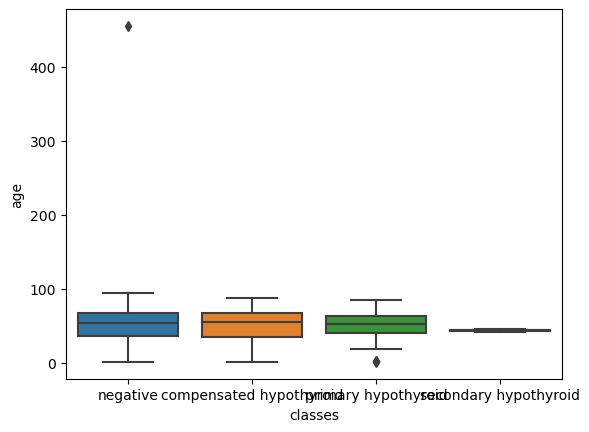

In [18]:
sns.boxplot( data=df, x='classes', y='age')

<Axes: xlabel='classes', ylabel='TSH'>

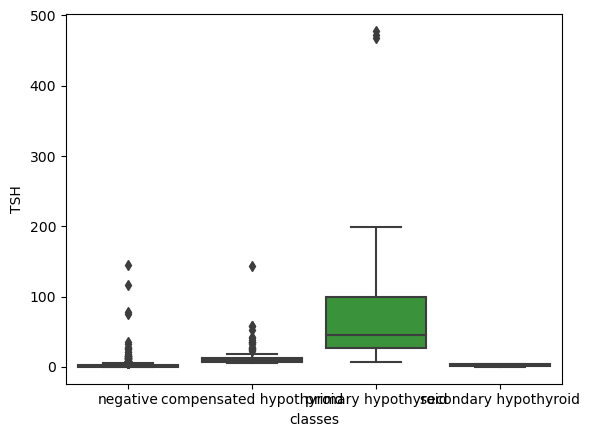

In [20]:
sns.boxplot(data=df, x='classes', y='TSH')


<Axes: xlabel='classes', ylabel='T3'>

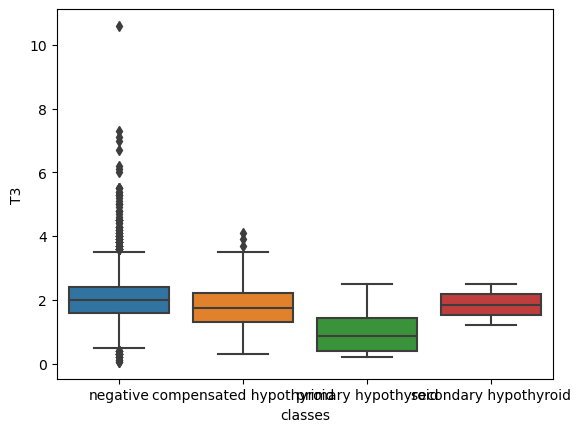

In [21]:
sns.boxplot(data=df, x='classes', y='T3')


<Axes: xlabel='classes', ylabel='TT4'>

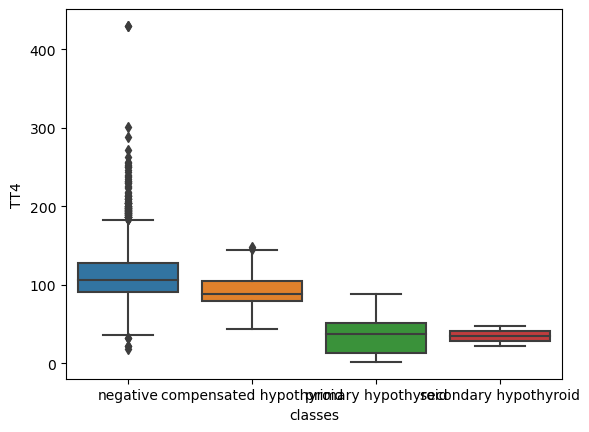

In [22]:
sns.boxplot(data=df, x='classes', y='TT4')


<Axes: xlabel='classes', ylabel='T4U'>

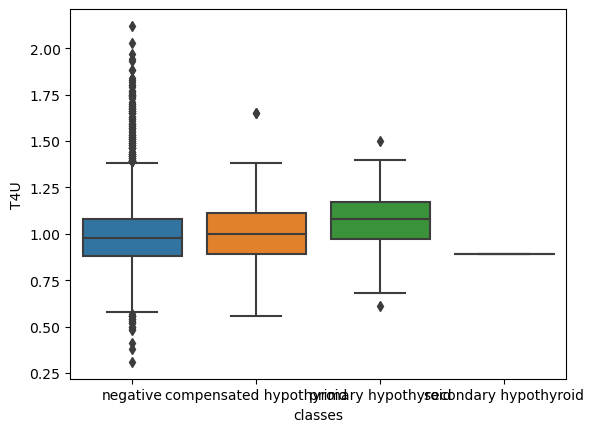

In [23]:
sns.boxplot(data=df, x='classes', y='T4U')


<Axes: xlabel='classes', ylabel='FTI'>

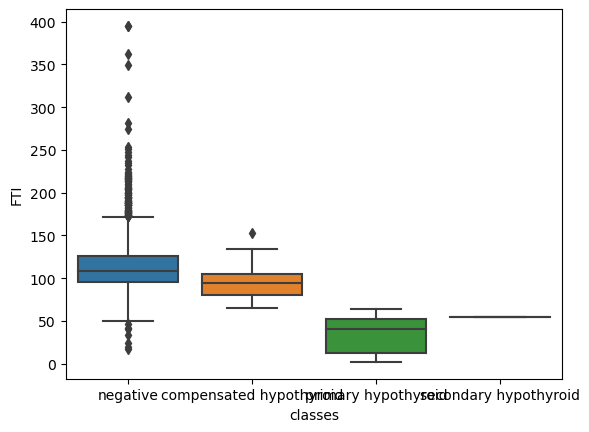

In [24]:
sns.boxplot(data=df, x='classes', y='FTI')

In [25]:
#T4U_measured just showed that T4U has a value or not
df[['T3_measured','T3','T4U_measured','T4U']]

,T3_measured,T3,T4U_measured,T4U
0,t,2.5,t,1.14
1,t,2.0,f,NaN
2,f,NaN,t,0.91
3,t,1.9,f,NaN
4,t,1.2,t,0.87
...,...,...,...,...
2795,f,NaN,t,1.05
2796,t,0.7,t,0.88
2797,f,NaN,t,0.80
2798,f,NaN,t,0.83


In [28]:
# The measured columns contain value t. or f.

df = df.drop(['Unnamed: 0', 'TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured', 'TBG_measured', 'TBG'],axis =1)


In [29]:
for column in df.columns:
     print(column, (df[column].unique()))

age [ 41.  23.  46.  70.  18.  59.  80.  66.  68.  84.  67.  71.  28.  65.
  42.  63.  51.  81.  54.  55.  60.  25.  73.  34.  78.  37.  85.  26.
  58.  64.  44.  48.  61.  35.  83.  21.  87.  53.  77.  27.  69.  74.
  38.  76.  45.  36.  22.  43.  72.  82.  31.  39.  49.  62.  57.   1.
  50.  30.  29.  75.  19.   7.  79.  17.  24.  15.  32.  47.  16.  52.
  33.  13.  10.  89.  56.  20.  90.  40.  88.  14.  86.  94.  12.   4.
  11.   8.   5. 455.   2.  91.   6.  nan  93.  92.]
sex ['F' 'M' nan]
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH [1.30e+00 4.10e+00 9.80e-01 1.60e-01 7.20e-01 3.00e-02      nan 2.20e+00
 6.00e-01 2.40e+00 1.10e+00 2.80e+00 3.30e+00 1.20e+01 1.20e+00 1.50e+00
 6.00e+00 2.10e+00 1.00e-01 8

In [27]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'classes'],
      dtype='object')

## Handling Missing VAlues

In [31]:
df['age'].fillna((df['age'].median()), inplace = True)
df['TSH'].fillna((df['TSH'].median()), inplace = True)
df['T3'].fillna((df['T3'].median()), inplace = True)
df['TT4'].fillna((df['TT4'].median()), inplace = True)
df['T4U'].fillna((df['T4U'].median()), inplace = True)
df['FTI'].fillna((df['FTI'].median()), inplace = True)
df['sex'].fillna(method='ffill',inplace=True)

## nomial categorical variables

In [32]:
categorical_features=df.select_dtypes(exclude='number')
for feature in categorical_features:
    print(f"{feature}:{categorical_features[feature].unique()}")

sex:['F' 'M']
on_thyroxine:['f' 't']
query_on_thyroxine:['f' 't']
on_antithyroid_medication:['f' 't']
sick:['f' 't']
pregnant:['f' 't']
thyroid_surgery:['f' 't']
I131_treatment:['f' 't']
query_hypothyroid:['f' 't']
query_hyperthyroid:['f' 't']
lithium:['f' 't']
goitre:['f' 't']
tumor:['f' 't']
hypopituitary:['f' 't']
psych:['f' 't']
referral_source:['SVHC' 'other' 'SVI' 'STMW' 'SVHD']
classes:['negative' 'compensated hypothyroid' 'primary hypothyroid'
 'secondary hypothyroid']


In [87]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,tsh,t3,tt4,t4u,fti,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.98,107.0,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,2.0,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.98,107.0,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative


In [33]:
df.to_csv("df_clean.csv")

## Nornmalize values fo categorical

In [35]:
cat=df[['sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery','I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium','goitre', 'tumor', 'hypopituitary', 'psych','referral_source']]

In [36]:
df.classes.value_counts()

classes
negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: count, dtype: int64

In [37]:
#using label encoder to normalize values
le = LabelEncoder()
#cols = df.select_dtypes(include=['object'])
for i in cat:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue

In [38]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,classes
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,1,negative
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.10,2.0,102.0,0.98,107.0,4,negative
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,2.0,109.0,0.91,120.0,4,negative
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175.0,0.98,107.0,4,negative
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,3,negative


In [39]:
target = df['classes']
target.shape

(2800,)

In [1]:
# Initialize the label encoder for target

import joblib
label_encoder = LabelEncoder()

# Fit and transform the target variable
target_encoded = label_encoder.fit_transform(target)

# Save the label encoder using joblib

joblib.dump(label_encoder, 'label_encoder.joblib')

NameError: name 'LabelEncoder' is not defined

In [ ]:
print(np.unique(target))
print(np.unique(target_encoded))

In [42]:
target.value_counts()

classes
negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: count, dtype: int64

In [43]:
target_encoded

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
#sns.heatmap(df.corr(),annot=True)

In [46]:
df.to_csv("preprocessed_data.csv")

## Splitting dataset into train set and test set

In [47]:
df['classes']

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
2795    negative
2796    negative
2797    negative
2798    negative
2799    negative
Name: classes, Length: 2800, dtype: object

In [48]:
X=df.drop(['classes'],axis=1)
y=target_encoded

In [49]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
target.unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [51]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()
X_sampled,y_sampled = ros.fit_resample(X,y)

print(X_sampled.shape)

X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)

X_sampled.head()


(10320, 22)


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.0,102.0,0.98,107.0,4
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,2.0,109.0,0.91,120.0,4
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,0.98,107.0,4
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,3


In [146]:
y_sampled.shape

(10320,)

In [52]:
y_sampled

array([1, 1, 1, ..., 3, 3, 3])

In [53]:
# train test set
X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8256, 22)
(2064, 22)
(8256,)
(2064,)


# MODELS

In [54]:
# RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("Random Forest:\n")
print(f'training accuracy:{rfc.score(X_train,y_train)}')
print(f'Testing accuracy:{rfc.score(X_test,y_test)}')
print(f'confusion matrix:\n{cm}')


Random Forest:

training accuracy:1.0
Testing accuracy:0.998546511627907
confusion matrix:
[[525   0   0   0]
 [  1 511   2   0]
 [  0   0 517   0]
 [  0   0   0 508]]


In [55]:
# SVC
from sklearn.svm import SVC
svc=SVC(gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("Support Vector Classifier:\n")
print(f'training accuracy:{svc.score(X_train,y_train)}')
print(f'Testing accuracy:{svc.score(X_test,y_test)}')
print(f'confusion matrix:\n{cm}')

Support Vector Classifier:

training accuracy:0.9998788759689923
Testing accuracy:1.0
confusion matrix:
[[525   0   0   0]
 [  0 514   0   0]
 [  0   0 517   0]
 [  0   0   0 508]]


In [56]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier:\n")
print(f'training accuracy:{dt.score(X_train,y_train)}')
print(f'Testing accuracy:{dt.score(X_test,y_test)}')
print(f'confusion matrix:\n{cm}')

Decision Tree Classifier:

training accuracy:0.9881298449612403
Testing accuracy:0.9874031007751938
confusion matrix:
[[525   0   0   0]
 [  3 509   2   0]
 [ 21   0 496   0]
 [  0   0   0 508]]


In [57]:
# KNN
knn=KNeighborsClassifier(metric='minkowski',p=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("KNeighbors Classifier:\n")
print(f'training accuracy:{knn.score(X_train,y_train)}')
print(f'Testing accuracy:{knn.score(X_test,y_test)}')
print(f'confusion matrix:\n{cm}')

KNeighbors Classifier:

training accuracy:0.9911579457364341
Testing accuracy:0.9907945736434108
confusion matrix:
[[525   0   0   0]
 [ 17 495   2   0]
 [  0   0 517   0]
 [  0   0   0 508]]


In [58]:
# sgb
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("KNeighbors Classifier:\n")
print(f'training accuracy:{xgb.score(X_train,y_train)}')
print(f'Testing accuracy:{xgb.score(X_test,y_test)}')
print(f'confusion matrix:\n{cm}')

KNeighbors Classifier:

training accuracy:1.0
Testing accuracy:0.998062015503876
confusion matrix:
[[525   0   0   0]
 [  1 510   3   0]
 [  0   0 517   0]
 [  0   0   0 508]]


In [59]:
## Classification Report (Accuracy, Precision, Recall and F1 Score)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      0.99      1.00       514
           2       0.99      1.00      1.00       517
           3       1.00      1.00      1.00       508

    accuracy                           1.00      2064
   macro avg       1.00      1.00      1.00      2064
weighted avg       1.00      1.00      1.00      2064



In [60]:
# Hypertunning
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = rfc, X=X_train,y=y_train,cv=10)
print(accuracies.mean())

0.9987887592633354


# Save model

In [61]:
import pickle
filename = ('thyroid_model.pkl')
pickle.dump(rfc,open(filename,'wb'))

# Load Model

In [62]:
model = open('thyroid_model.pkl','rb')
forest = pickle.load(model)

In [63]:
y_pred = forest.predict(X_test)
y_pred

array([1, 0, 2, ..., 3, 1, 2])

In [64]:
confusion_matrix(y_test, y_pred)

array([[525,   0,   0,   0],
       [  1, 511,   2,   0],
       [  0,   0, 517,   0],
       [  0,   0,   0, 508]], dtype=int64)

# Prediction

In [65]:
X_test.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source'],
      dtype='object')

In [66]:
#y_test.iloc[-2]
#y_test
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,classes
2795,70.0,1,0,0,0,0,0,0,0,0,...,0,0,0,2.7,2.0,155.0,1.05,148.0,3,negative
2796,73.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1.4,0.7,63.0,0.88,72.0,4,negative
2797,75.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.4,2.0,147.0,0.80,183.0,4,negative
2798,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.4,2.0,100.0,0.83,121.0,4,negative
2799,81.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.2,1.5,114.0,0.99,115.0,3,negative


In [67]:
X_test.iloc[-2]

age                           29.00
sex                            0.00
on_thyroxine                   0.00
query_on_thyroxine             0.00
on_antithyroid_medication      0.00
sick                           0.00
pregnant                       0.00
thyroid_surgery                0.00
I131_treatment                 0.00
query_hypothyroid              0.00
query_hyperthyroid             0.00
lithium                        0.00
goitre                         0.00
tumor                          0.00
hypopituitary                  0.00
psych                          0.00
TSH                            1.40
T3                             2.00
TT4                          104.00
T4U                            0.98
FTI                          107.00
referral_source                4.00
Name: 828, dtype: float64

In [68]:
print(forest.predict([[29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,2,104,0.98,107,4]]))

[1]


In [69]:
data=[[29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,2,104,0.98,107,4]]

In [70]:
forest.predict(data)

array([1])

In [71]:
label_predictor=joblib.load('label_encoder.joblib')

In [72]:
print(np.unique(target))
print(np.unique(target_encoded))

['compensated hypothyroid' 'negative' 'primary hypothyroid'
 'secondary hypothyroid']
[0 1 2 3]


In [73]:
label_predictor.inverse_transform([3])

array(['secondary hypothyroid'], dtype=object)

In [3]:
forest.predict(data)[0]

NameError: name 'forest' is not defined

In [75]:
forest.predict([1])

ValueError: Expected 2D array, got 1D array instead:
array=[1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.